In [139]:
# Import libraries

import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from collections import namedtuple

import numpy as np
import math

In [140]:
# Define fuzzy mapping function

def fuzzyAndMap(setA, setB):
    """
    Taken from equation 8.2 in "Introduction to Fuzzy Logic"
    
    Accepts two lists (fuzzy sets) as paramteters, and returns
    a 2D array of the relation between the two sets (Fuzzy AND).
    """
    #fuzzyMap = np.empty((len(setA), len(setB)), dtype=float)
    if len(setA) != len(setB):
        print("Fuzzy sets must be of the same length")
        return 0
    fuzzyMap = [[0 for x in range(len(setA))] for y in range(len(setB))]
    for i in range(len(setA)):
        for j in range(len(setB)):
            fuzzyMap[i][j] = min(setA[i], setB[j])
    return fuzzyMap

def fuzzyAndLinear(setA, setB):
    if len(setA) != len(setB):
        print("Fuzzy sets must be of the same length")
        return 0
    fuzzyLine = [0 for x in range(len(setA))]
    for i in range(len(setA)):
        fuzzyLine[i] = min(setA[i], setB[i])
    return fuzzyLine
        

def fuzzyOrMap(setA, setB):
    """
    Accepts two lists (fuzzy sets) as parameters, returns 
    a 2D array of the relation between the two sets (Fuzzy OR)
    """
    fuzzyMap = np.empty((len(setA), len(setB)), dtype=float)
    for i in range(len(setA)):
        for j in range(len(setB)):
            fuzzyMap[i][j] = max(setA[i], setB[j])
    return fuzzyMap

def fuzzyOrLinear(setA, setB):
    if len(setA) != len(setB):
        print("Fuzzy sets must be of the same length")
        return 0
    fuzzyLine = [0 for x in range(len(setA))]
    for i in range(len(setA)):
        fuzzyLine[i] = max(setA[i], setB[i])
    return fuzzyLine

def blendCauchian(d = 0.0, u = 1.0, s = 0.0, cat = 2.0): # Cauchian, in ioflo
    d = float(d)
    u = float(u)
    s = float(s) 

    if u == 0:  # don't divide by zero. 
        return 0
    b = 1.0 / ( 1 + abs(d-s/u) ** (2*cat) )

    return b

def owao(setA, weights):
    """
    Ordered Weighted Averaging Operator
    
    Accepts two lists: one of fuzzy values, and one of the 
    weights of those values. Must be ordered before being 
    passed to this function. weight[i] must correspond to
    setA[i].
    """
    if len(setA) != len(weights):
        print("Set and weights must be the same length")
        return 0
    b = 0
    for i in range(len(setA)):
        b += setA[i] * weights[i]
    return b

def alternativeEquivalence(setA, setB):
    """
    Taken from eq. 10.22 in "Introduction to Fuzzy Logic"
    
    Accepts two lists as parameters, which must be of equal length.
    Returns the alternative equivalence relation between the two sets.
    """
    if len(setA != setB):
        print("Sets must be equal length")
        return 0
    b = []
    for i in range(len(setA)):
        b.append(max((1 - setA[i]),min(setA[i], setB[i])  ))
    return b

def gowa(w, wm, l=1.0):
    if len(w) != len(wm):
        raise ValueError("Weights and membership value lists must be of equal length.")

    if l == 0:
        raise ZeroDivisionError("Param l cannot be 0.  Use -.000000000001 for owg.")

    wm.sort(reverse=True)

    s = 0
    for i in range(len(w)):
        s += w[i] * math.pow(wm[i], l)

    return math.pow(s, 1/l)

def owg(w, wm):
    if len(w) != len(wm):
        raise ValueError("Weights and membership value lists must be of equal length.")

    wm.sort(reverse=True)

    s = 1
    for i in range(len(w)):
        s *= math.pow(wm[i], w[i])

    return s

def owh(w, wm):
    return gowa(w, wm, -1)

def owq(w, wm):
    return gowa(w, wm, 2)

def veryHedge(setA):
    """
    Equation taken from 10.11.
    
    Takes a list as a parameter (a fuzzy set), 
    and returns the "very" hedged version of that set.
    
    I'm including this function in this script just to group 
    the chapter 10 equations together.
    """
    out = []
    for i in range(len(setA)):
        out.append(round(setA[i]**2, 4)) #Round to 4 significant figures
    return out

def veryS(val):
    return round(val **2, 4)

def somewhatHedge(setA):
    """
    Equation taken from 10.12.
    
    Takes a list as a parameter (a fuzzy set), 
    and returns the "somewhat" hedged version of that set.
    """
    out = []
    for i in range(len(setA)):
        out.append(math.sqrt(setA[i]))
    return out

def somewhatS(val):
    return math.sqrt(val)

def blendSigmoid(d = 0.0, u = .01, s = 2, inverse=False): # sigmoidal, in ioflo
    v = float(abs(u * s)) 
    a = float(abs(d)) #symmetric about origin
    
    b = 1 / (1 + math.e ** (s * (u-d) ))
    
    if inverse == True:
        b = 1 - b

    return b

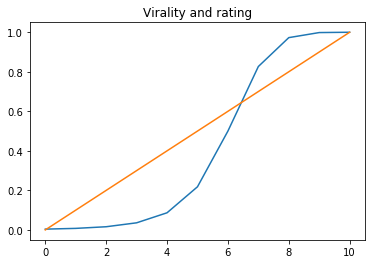

In [174]:
# Example of blending two sets to show the 3D graphing functions

# Create some data
testSetA = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
testSetB = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

virality = []
rating = testSetA
xcoord = []

for i in range(len(testSetA)):
    virality.append(blendCauchian(-2 * testSetB[i], s=0.1, u=0.5, cat=3.5))
    xcoord.append(i)
    
plt.plot(xcoord, virality)
plt.plot(xcoord, rating)
plt.title('Virality and rating')
plt.show()

In [157]:
vAndR = fuzzyAndLinear(virality, rating)
vOrR = fuzzyOrLinear(virality, rating)

veryViral = veryHedge(virality)
veryRate = veryHedge(rating)
somewhatViral = somewhatHedge(virality)
somewhatRate = somewhatHedge(rating)

vvAvr = fuzzyAndLinear(veryViral, veryRate)        #Very viral and very highly rated
vvAsr = fuzzyAndLinear(veryViral, somewhatRate)    #Very viral and somewhat highly rated
svAvr = fuzzyAndLinear(somewhatViral, veryRate)    #somewhat viral and very highly rated
svAsr = fuzzyAndLinear(somewhatViral, somewhatRate)#somewhat viral and somewhat highly rated

vvOvr = fuzzyOrLinear(veryViral, veryRate)         #Very viral or very highly rated
vvOsr = fuzzyOrLinear(veryViral, somewhatRate)     #Very viral or somewhat highly rated
svOvr = fuzzyOrLinear(somewhatViral, veryRate)     #somewhat viral or very highly rated
svOsr = fuzzyOrLinear(somewhatViral, somewhatRate) #somewhat viral or somewhat highly rated

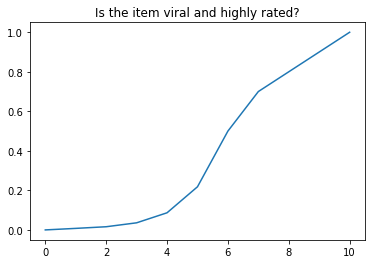

In [158]:
# Virality AND rating - showing the threshold for if 
#  something is viral and has a high rating

plt.plot(xcoord, vAndR)
plt.title('Is the item viral and highly rated?')
plt.show()


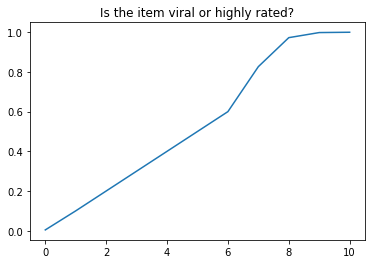

In [159]:
# Virality OR rating - showing the threshold for if 
#  something is viral or has a high rating

plt.plot(xcoord, vOrR)
plt.title('Is the item viral or highly rated?')
plt.show()


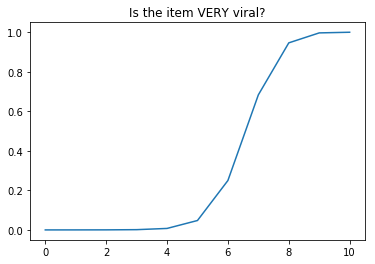

In [160]:
# Very viral

plt.plot(xcoord, veryViral)
plt.title('Is the item VERY viral?')
plt.show()

[]

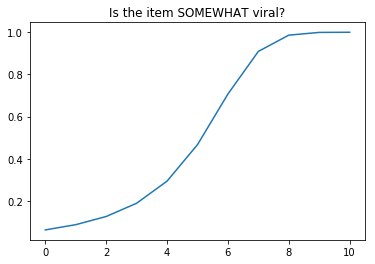

In [161]:
# Somewhat viral

plt.plot(xcoord, somewhatViral)
plt.title('Is the item SOMEWHAT viral?')
plt.plot()

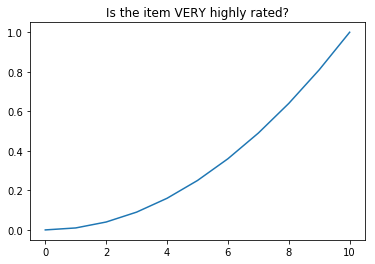

In [162]:
# Very highly rated

plt.plot(xcoord, veryRate)
plt.title('Is the item VERY highly rated?')
plt.show()

[]

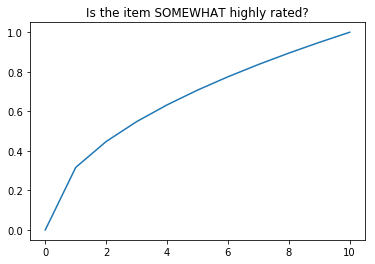

In [177]:
# Somewhat highly rated

plt.plot(xcoord, somewhatRate)
plt.title('Is the item SOMEWHAT highly rated?')
plt.plot()

[]

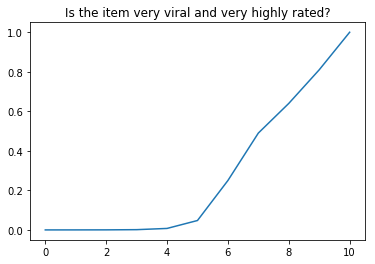

In [164]:
# Very viral and very highly rated

plt.plot(xcoord, vvAvr)
plt.title('Is the item very viral and very highly rated?')
plt.plot()

[]

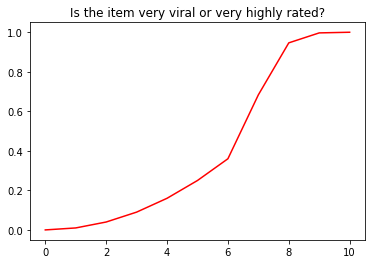

In [165]:
# Very viral or very highly rated

plt.plot(xcoord, vvOvr, color='red')
plt.title('Is the item very viral or very highly rated?')
plt.plot()

[]

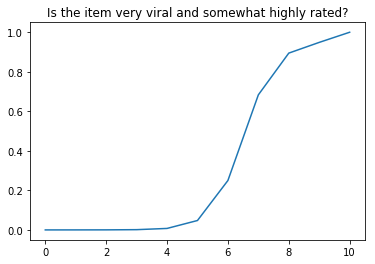

In [178]:
# Very viral and somewhat highly rated

plt.plot(xcoord, vvAsr)
plt.title('Is the item very viral and somewhat highly rated?')
plt.plot()

[]

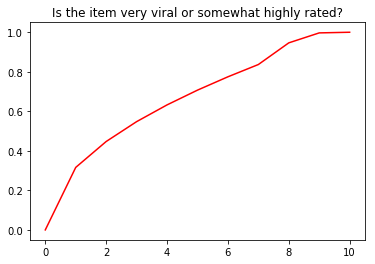

In [167]:
# Very viral or somewhat highly rated

plt.plot(xcoord, vvOsr, color='red')
plt.title('Is the item very viral or somewhat highly rated?')
plt.plot()

[]

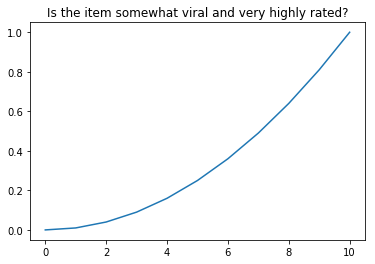

In [168]:
# Somewhat viral and very highly rated

plt.plot(xcoord, svAvr)
plt.title('Is the item somewhat viral and very highly rated?')
plt.plot()

[]

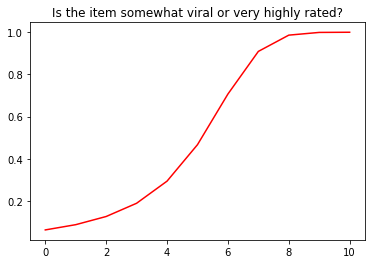

In [169]:
# Somewhat viral or very highly rated

plt.plot(xcoord, svOvr, color='red')
plt.title('Is the item somewhat viral or very highly rated?')
plt.plot()

[]

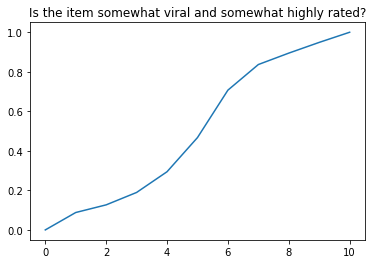

In [170]:
# Somewhat viral and somewhat highly rated

plt.plot(xcoord, svAsr)
plt.title('Is the item somewhat viral and somewhat highly rated?')
plt.plot()

[]

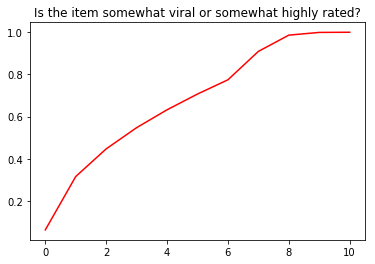

In [171]:
# Somewhat viral or somewhat highly rated

plt.plot(xcoord, svOsr, color='red')
plt.title('Is the item somewhat viral or somewhat highly rated?')
plt.plot()